(c) Juan Gomez 2019. Thanks to Universidad EAFIT for support. This material is part of the course Introduction to Finite Element Analysis

# SOLUTION: Introduction to One-Dimensional Lagrange Interpolation

## By Juan Gomez

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import sympy as sym

### Class activity

**Follow the steps indicated next to implement, in an independent notebook, an interpolation scheme typical of the ones used in FEM codes. The resulting scheme would correspond to the interpolation within a single element**.

## Shape functions

* Assuming that a constant interpolation domain is defined as $x \in \left[ {{-1.0},{+1.0}} \right]$ with nodal points corresponding to $x^0 = -1.0$, $x^1 = +1.0$, $x^2 = 0.0$, $x^3 = -0.25$ and $x^4 = +0.25$ use the function `LagrangPoly()` to generate the interpolation functions associated to these 5 nodal points. In a single graph plot the resulting polynomials.

In [2]:
def LagrangPoly(x, order, i, xi=None):
    if xi == None:
        xi = sym.symbols('x:%d' % (order+1))
    index = list(range(order+1))
    index.pop(i)
    return sym.prod([(x-xi[j])/(xi[i]-xi[j]) for j in index])

In [3]:
npts = 200
yy = np.zeros((npts))
xx = np.linspace(-1, 1, npts)

In [4]:
x = sym.symbols('x')
pol = []
pol.append(sym.simplify(LagrangPoly(x, 4, 0, [-1, 1, 0 , -0.25 , 0.25])))
pol.append(sym.simplify(LagrangPoly(x, 4, 1, [-1, 1, 0 , -0.25 , 0.25])))
pol.append(sym.simplify(LagrangPoly(x, 4, 2, [-1, 1, 0 , -0.25 , 0.25])))
pol.append(sym.simplify(LagrangPoly(x, 4, 3, [-1, 1, 0 , -0.25 , 0.25])))
pol.append(sym.simplify(LagrangPoly(x, 4, 4, [-1, 1, 0 , -0.25 , 0.25])))
#print(pol)

<IPython.core.display.Javascript object>


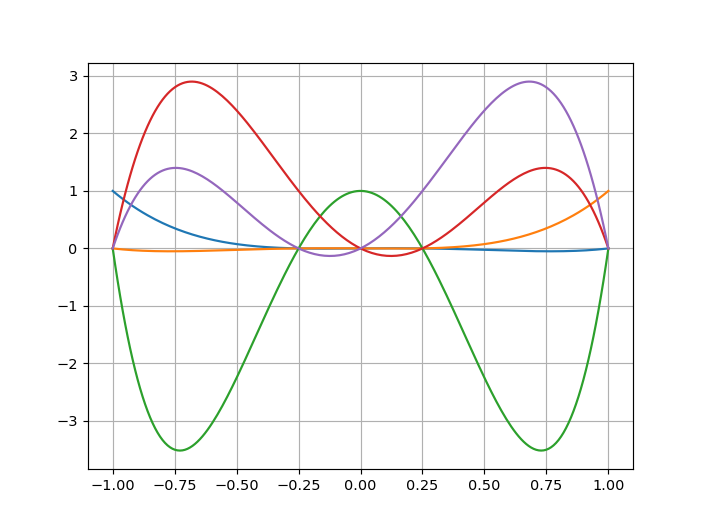

In [5]:
plt.figure(0)
plt.grid()
for k in range(5):
    for i in range(npts):
        yy[i] = pol[k].subs([(x, xx[i])])
    plt.plot(xx, yy)

## Interpolating polynomial

* Use the interpolation functions found in the previous step, to define a matrix $\left[N(x)\right]$, which will be called in what follows the `function interpolation matrix`, in such a way that the interpolation operation can be conducted using matrix operations like:

$$\hat f(x) = \left[N(x)\right]\left\{F\right\}$$

and where $F$ is a vector storing the nodal values of the function. In your Notebook print the symbolic version of the interpolation matrix.

* In your Notebook plot a function $f(x)$ (representing temperature in a bar) and its interpolated version $\hat f(x)$ using the matrix scheme developed in the previous step. The code should plot also the first order derivative of the function.

In [6]:
fx = lambda x: x**4 + 4.0*x**3 + 3.0*x**2 - 10.0

In [7]:
npts = 200
yy = np.zeros((npts))
xx = np.linspace(-1, 1, npts)

In [8]:
fd = np.array([fx(-1.0), fx(1.0), fx(0.0) , fx(-0.25) , fx(+0.25)])
print(fd)

[-10.          -2.         -10.          -9.87109375  -9.74609375]


In [9]:
print(pol[0]*fd[0] + pol[1]*fd[1] + pol[2]*fd[2] + pol[3]*fd[3] + pol[4]*fd[4])

-160.0*x**4 + 170.0*x**2 - 5.0*x*(0.8*x - 0.2)*(x - 1)*(1.33333333333333*x + 0.333333333333333) - 1.0*x*(0.8*x + 0.2)*(x + 1)*(1.33333333333333*x - 0.333333333333333) + 42.1166666666667*x*(x - 1)*(x + 1)*(2.0*x - 0.5) + 41.5833333333333*x*(x - 1)*(x + 1)*(2.0*x + 0.5) - 10.0


<IPython.core.display.Javascript object>


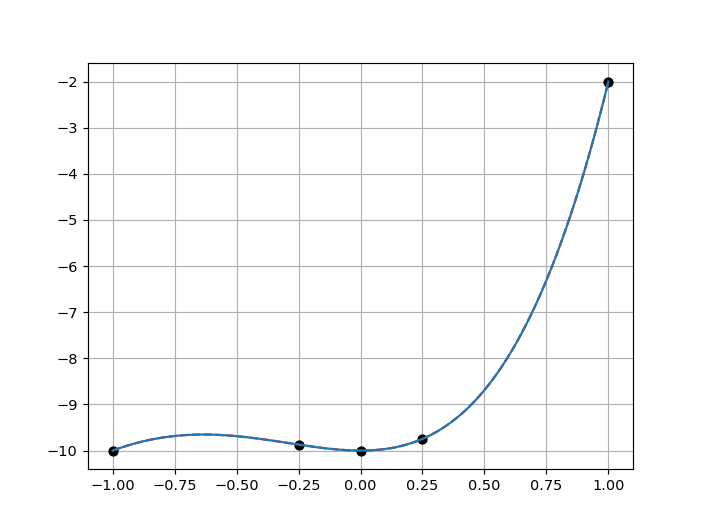

In [10]:
plt.figure(2)
plt.grid()
for i in range(npts):
    yy[i] = fd[0]*pol[0].subs([(x, xx[i])]) + fd[1]*pol[1].subs([(x, xx[i])]) \
        + fd[2]*pol[2].subs([(x, xx[i])]) + fd[3]*pol[3].subs([(x, xx[i])]) \
        + fd[4]*pol[4].subs([(x, xx[i])])

zz = fx(xx)
plt.plot([-1, 1, 0 , -0.25 , 0.25], fd, 'ko')
plt.plot(xx, yy, 'r--')
plt.plot(xx, zz)

## Derivative

In [11]:
fdx = lambda x: 4*x**3 + 12.0*x**2 + 6.0*x

fc = np.array([fdx(-1.0), fdx(1.0), fdx(0.0) , fdx(-0.25) , fdx(0.25)])

The interpolatted derivatives are then obtained according to:


\begin{equation}
\hat f'(x) = \frac{dL^0(x)}{dx} f^0 + \frac{dL^1(x)}{dx}(x) f^1 + \frac{dL^2(x)}{dx} f^2 + + \frac{dL^3(x)}{dx} f^3 + + \frac{dL^4(x)}{dx} f^4
\end{equation}

<IPython.core.display.Javascript object>


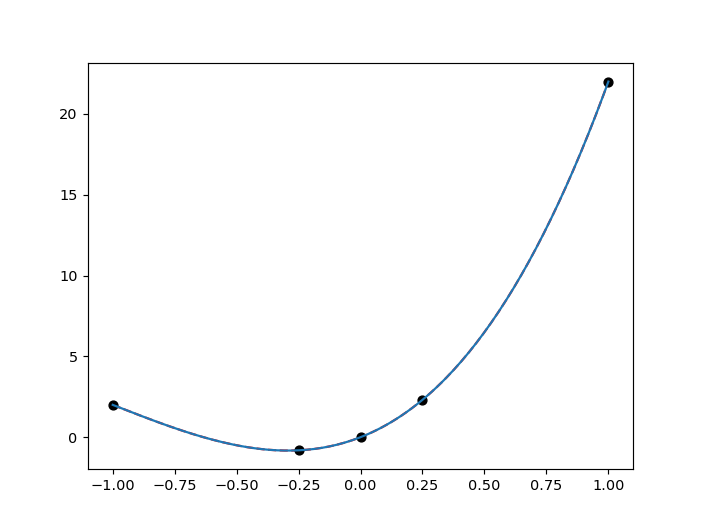

In [12]:
dpol = []
dpol.append(sym.diff(pol[0], x))
dpol.append(sym.diff(pol[1], x))
dpol.append(sym.diff(pol[2], x))
dpol.append(sym.diff(pol[3], x))
dpol.append(sym.diff(pol[4], x))
#print(dpol)
#print(dpol[0]*fd[0] + dpol[1]*fd[1] + dpol[2]*fd[2] + dpol[3]*fd[3] + dpol[4]*fd[4])
#
plt.figure(3)
yy = fdx(xx)
plt.plot(xx, yy, 'r--')
plt.plot([-1, 1, 0 , -0.25 , 0.25], fc, 'ko')
#
for i in range(npts):
    yy[i] = fd[0]*dpol[0].subs([(x, xx[i])]) + fd[1] * \
        dpol[1].subs([(x, xx[i])]) + fd[2]*dpol[2].subs([(x, xx[i])]) \
    + fd[3]*dpol[3].subs([(x, xx[i])]) + fd[4]*dpol[4].subs([(x, xx[i])])
plt.plot(xx, yy)

## Matrix scheme like in the FEM

* To conduct the interpolation in the Notebook create a Python function or subroutine that takes as input parameters the coordinate $x$ where the function is to be approximated and the vector of nodal values of the temperature function and returns upon execution the interpolated value of the function.

In [13]:
def shape1d(x , un):
    N = sym.Matrix([[x*(0.8*x - 0.2)*(x - 1)*(1.33333333333333*x + 0.333333333333333)/2,
         x*(0.8*x + 0.2)*(x + 1)*(1.33333333333333*x - 0.333333333333333)/2,
         16.0*x**4 - 17.0*x**2 + 1.0 , -4.26666666666667*x*(x - 1)*(x + 1)*(2.0*x - 0.5) ,
         -4.26666666666667*x*(x - 1)*(x + 1)*(2.0*x + 0.5) ]])
    u_int = N*un
#
    return u_int

In [14]:
uu = sym.Matrix([-10.0, -2.0 , -10.0 , -9.87 , -9.74])

xx = 0.50

u_int = shape1d(xx , uu)
print(u_int)

Matrix([[-8.67200000000003]])


In [15]:
from IPython.core.display import HTML
def css_styling():
    styles = open('nb_style.css', 'r').read()
    return HTML(styles)
css_styling()